# __Pipeline 3, Pt 1__
## _IQR --> Normalization --> Z Score_


# Importing Data:

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


# import `logistic regression` model
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [3]:
compdata_original.shape

# do we have enough data? - YES
# 682 rows and 22 columns

(682, 22)

In [4]:
compdata_original.describe(include='all')
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [5]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [6]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations

- try to find code that shows columns with negative values (True, False)

In [7]:
# T2 has 2 missing values, show their location

compdata.loc[compdata['T2'] == 0]


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [8]:
# Fill in the '0.0' values with the mean of T2

compdata.loc[125,'T2']=compdata['T2'].mean()
compdata.loc[199,'T2']=compdata['T2'].mean()

In [9]:
# Make sure there are no more '0.0' values

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [10]:
# T5 has negative number, show location 

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [11]:
# fill in negative T5 with mean

compdata.loc[7,'T5']=compdata['T5'].mean()

In [12]:
# Make sure there's no more negative value

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [13]:
# S1 has negative number, show location

compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [14]:
# Fill the 0, negative, and infinite values with the mean for continuous values
compdata['S1'].mean()

68.42143906020559

In [15]:
# fill in negative S1 with mean

compdata.loc[134,'S1']=compdata['S1'].mean()

In [16]:
# Make sure there's no more negative value

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [17]:
# Ratios:

    # ** How to find the ratio for T1 and T2... drop them
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing/Negative Data:

In [18]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [19]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

## Drop Missing P Values as we cannot impute these.

In [20]:
# Drop missing P Values from DF

compdata = compdata.dropna(how='all', subset=['P(1Day)'])

In [21]:
compdata.isna().sum()

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

Now that we've dropped the missing P values, we simply need to impute C3 and C7 as they are the only remaining missing values in the dataframe.

## Impute C3 & C7

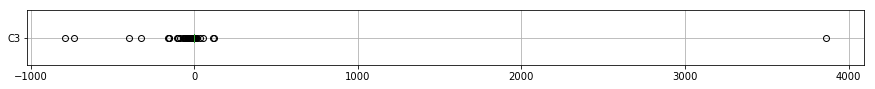

In [22]:
# C3 imputation
# check distribution to determine if mean or median should be used

compdata.boxplot(column='C3',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [23]:
compdata['C3_'] = compdata['C3'].fillna(compdata['C3'].median())

In [24]:
compdata.isna().sum()

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

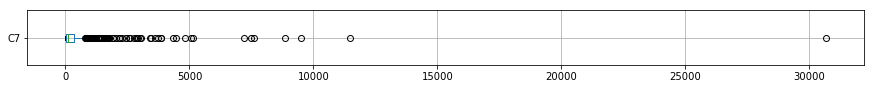

In [25]:
# C7 imputation
# check distribution to determine if mean or median should be used.


compdata.boxplot(column='C7',vert=False, figsize=(15,1))

# since there are clear outliers, will use median.

In [26]:
compdata['C7_'] = compdata['C7'].fillna(compdata['C7'].median())

In [27]:
compdata.isna().sum()

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
C7_         0
dtype: int64

# Split DF into Separate DFs 

## Categorical

In [28]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','C7_','C3_'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,0,1


## Continuous 

In [29]:
# Create DF with only continuous features
# Drop C3, C7 as well since we have separate imputed columns for these 
# Drop T1, T2 as they were used to calculate T3 
# Drop 

compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','C2','C3','C6','C7','Y1','Y2','C3_','T1','T2','T3','T4','T5','C5','C7_','S1','S2','S3'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000


In [30]:
compdata_cont.isna().sum()

C1     0
C4     0
T3_    0
T4_    0
T5_    0
S1_    0
S2_    0
S3_    0
C5_    0
C6_    0
dtype: int64

## Target Variables

In [31]:
target_vals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T3','T1','T2','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','C7_'], axis=1)
target_vals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


# Outlier Detection

In [32]:
compdata_cont.shape

(660, 10)

In [33]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 
# Standardize first!

# only continuous

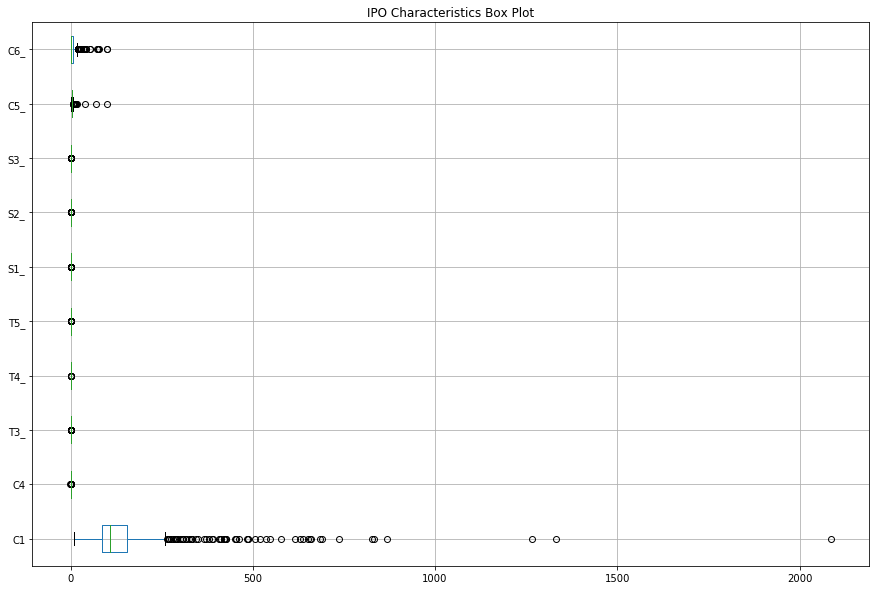

In [34]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [35]:
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000


## IQR 

In [36]:
# create function for upper bound 

for col in compdata_cont.columns:
    u_bound = compdata_cont[col].quantile(0.75) + (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [37]:
# create function for lower bound

for col in compdata_cont.columns:
    l_bound = compdata_cont[col].quantile(0.25) - (1.5*(compdata_cont[col].quantile(0.75)-compdata_cont[col].quantile(0.25)))
    compdata_cont[col][compdata_cont[col] < l_bound] = l_bound

In [38]:
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,7.868826,0.000000
2,90.0,0.020715,0.909350,0.636816,0.061764,0.009440,0.006271,0.011403,3.369134,0.000000
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009440,0.007144,0.013319,3.299697,0.000000
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000


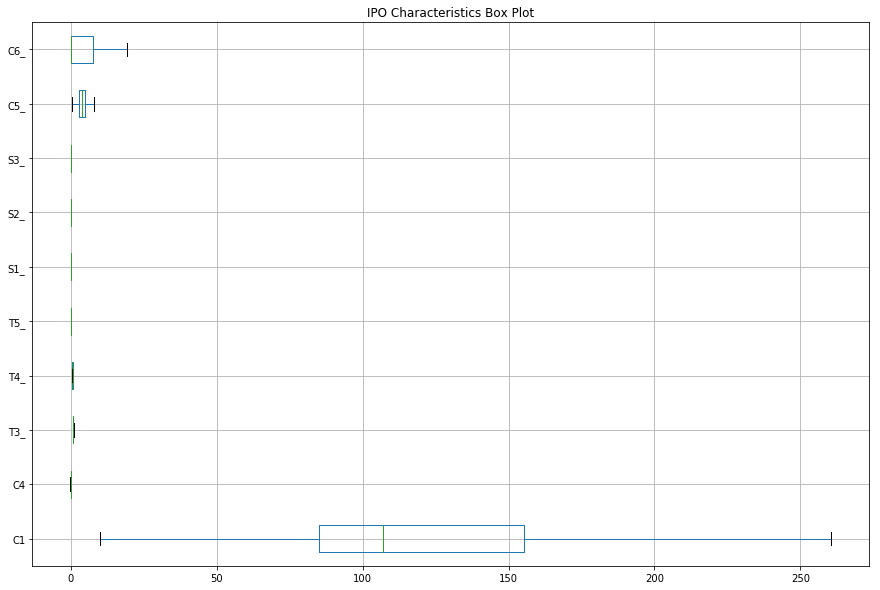

In [39]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

We now see there are no more outliers per the box plot above.

# Normalization
- check out : 
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

## Skewness

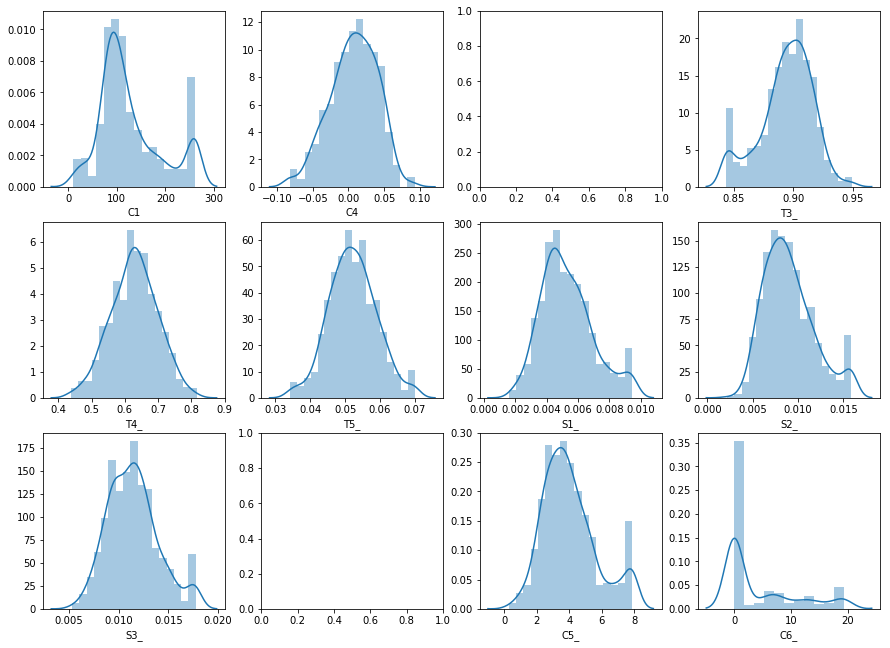

In [40]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot 
f, axes = plt.subplots(3, 4, figsize=(15,11), sharex=False)
sns.distplot( compdata_cont["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont["T3_"] , ax=axes[0, 3])
sns.distplot( compdata_cont["T4_"] , ax=axes[1, 0])
sns.distplot( compdata_cont["T5_"] , ax=axes[1, 1])
sns.distplot( compdata_cont["S1_"] , ax=axes[1, 2])
sns.distplot( compdata_cont["S2_"] , ax=axes[1, 3])
sns.distplot( compdata_cont["S3_"] , ax=axes[2, 0])
sns.distplot( compdata_cont["C5_"] , ax=axes[2, 2])
sns.distplot( compdata_cont["C6_"] , ax=axes[2, 3])
plt.show()

In [41]:
compdata_cont.max()

C1     260.625000
C4       0.092896
T3_      0.949107
T4_      0.815658
T5_      0.070019
S1_      0.009440
S2_      0.015854
S3_      0.017752
C5_      7.868826
C6_     19.230769
dtype: float64

In [42]:
compdata_cont.skew()

# check if its left or right skewed
# remove unnecessary columns from compdata 

C1     0.836620
C4    -0.314465
T3_   -0.545971
T4_   -0.073967
T5_    0.110769
S1_    0.608468
S2_    0.694781
S3_    0.476608
C5_    0.724354
C6_    1.201653
dtype: float64

In [43]:
# Negative skew

compdata_cont['T3_'] = compdata_cont['T3_'].apply(np.exp)
compdata_cont['T3_'].skew()

-0.4877946272093146

In [44]:
# Positive skew

compdata_cont['C1'] = compdata_cont['C1'].apply(np.sqrt)
compdata_cont['C1'].skew()

0.20112992112913158

In [45]:
# Positive skew

compdata_cont['S1_'] = compdata_cont['S1_'].apply(np.sqrt)
compdata_cont['S1_'].skew()

0.20562858689826774

In [46]:
# Positive skew

compdata_cont['S2_'] = compdata_cont['S2_'].apply(np.log)
compdata_cont['S2_'].skew()

-0.11467532069547508

In [47]:
# Positive skew

compdata_cont['C5_'] = compdata_cont['C5_'].apply(np.sqrt)
compdata_cont['C5_'].skew()

0.12889897265709233

In [69]:
# Positive skew

compdata_cont['C6_'] = compdata_cont['C6_'].apply(np.sqrt)
compdata_cont['C6_'].skew()

-0.42100165423572794

# Z-Score 

In [70]:
from scipy.stats import zscore

compdata_cont = compdata_cont.apply(zscore)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_
0,0.049017,0.661154,0.653646,0.175548,0.301174,-0.180189,0.230636,-0.196813,0.014029,NaN
1,1.839967,-0.634992,0.183926,0.237492,-0.119041,-1.313304,0.847953,-0.217834,2.061600,NaN
2,-0.503911,0.405772,0.675674,0.123885,1.407310,2.251685,-1.025124,-0.008762,-0.303770,NaN
3,1.259325,0.384635,1.035775,-1.267028,1.387606,2.251685,-0.598198,0.751535,-0.350153,NaN
4,-0.696399,-1.293151,-0.285734,-0.583199,-0.537818,-0.411746,0.519818,-0.064922,-0.072424,NaN


# Correlation

## Skewness 

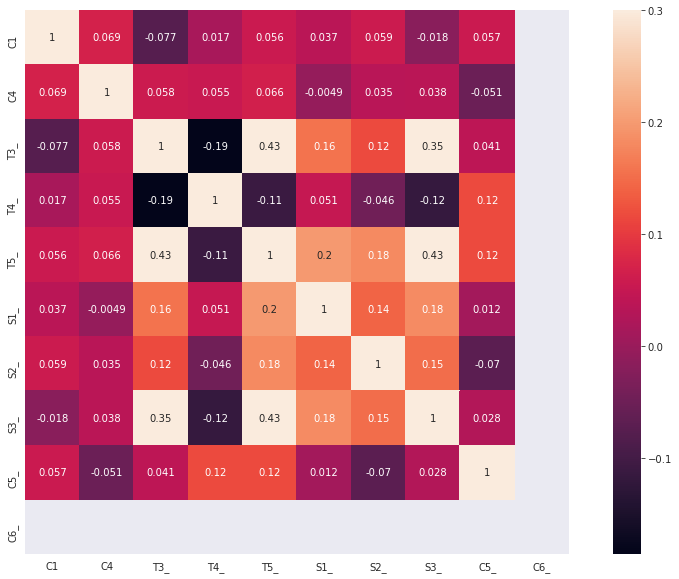

In [71]:
# Correlation between Variables

cont_corr = compdata_cont.corr()

with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(cont_corr, vmax=.3, square=True,annot=True)

In [51]:
compdata_cont.corr()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_
C1,1.000000,0.068989,-0.077262,0.016596,0.056196,0.037163,0.058562,-0.017560,0.056682,-0.048835
C4,0.068989,1.000000,0.058334,0.054948,0.066147,-0.004919,0.034743,0.038099,-0.050988,0.104959
T3_,-0.077262,0.058334,1.000000,-0.185353,0.430392,0.157534,0.116747,0.350093,0.041195,-0.045710
T4_,0.016596,0.054948,-0.185353,1.000000,-0.109971,0.051118,-0.045665,-0.115328,0.117111,-0.008935
T5_,0.056196,0.066147,0.430392,-0.109971,1.000000,0.198452,0.181954,0.428271,0.117577,-0.105828
S1_,0.037163,-0.004919,0.157534,0.051118,0.198452,1.000000,0.141834,0.182821,0.011591,-0.074308
S2_,0.058562,0.034743,0.116747,-0.045665,0.181954,0.141834,1.000000,0.151146,-0.070027,-0.113731
S3_,-0.017560,0.038099,0.350093,-0.115328,0.428271,0.182821,0.151146,1.000000,0.027775,-0.048509
C5_,0.056682,-0.050988,0.041195,0.117111,0.117577,0.011591,-0.070027,0.027775,1.000000,0.138273
C6_,-0.048835,0.104959,-0.045710,-0.008935,-0.105828,-0.074308,-0.113731,-0.048509,0.138273,1.000000


# Binning

## Identify values in I3 that have multiple values and replace them with 1.
- we discovered (via some handy Excel work) that some values in I3 had multiple SIC codes.
- need to replace these first.

In [52]:
compdata_cat[compdata_cat["I1"]=='DLB']

,I1,I2,I3,C2,Y1,Y2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",1.0,0,1


In [53]:
compdata_cat[compdata_cat["I1"]=='DTSI']

,I1,I2,I3,C2,Y1,Y2
187,DTSI,"DTS, INC.","3651, 6794, 7819",0.0,0,1


In [54]:
compdata_cat[compdata_cat["I1"]=='RLD']

,I1,I2,I3,C2,Y1,Y2
499,RLD,RealD Inc.,"3663, 3861, 6794",1.0,0,1


In [55]:
compdata_cat[compdata_cat["I1"]=='UPG']

,I1,I2,I3,C2,Y1,Y2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",0.0,1,1


## Replace I3 values with one value.
- placed them in sensible industry based on the most common industries of the 4 values.

In [56]:
# adding to manufacturing 

compdata_cat.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [57]:
# adding to nonclassifiable 

compdata_cat.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [58]:
# adding to manufacturing

compdata_cat.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [59]:
# adding to nonclassifiable 

compdata_cat.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [60]:
# adding to services

compdata_cat.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [61]:
# make I3 a numerical column so we can properly bin

compdata_cat["I3"] = pd.to_numeric(compdata_cat["I3"])

## SIC Code Bins

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-0999 | Agriculture, Forestry and Fishing |
| 1000-1499 | Mining |
| 1800-1999 | not used |
| 2000-3999 | Manufacturing |
| 4000-4999 | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199 | Wholesale Trade |
| 5200-5999 | Retail Trade |
| 6000-6799 | Finance, Insurance and Real Estate |
| 7000-8999 | Services |
| 9100-9729 | Public Administration |
| 9900-9999 | Nonclassifiable |


In [62]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins'] = compdata_cat['I3'].apply(assign_I3_bins)  

compdata_cat.head()

,I1,I2,I3,C2,Y1,Y2,I3_bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,0,1,5
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,1,0,5
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,1,0,5
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,1,1,5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,0,1,6


## Analyze the Bins

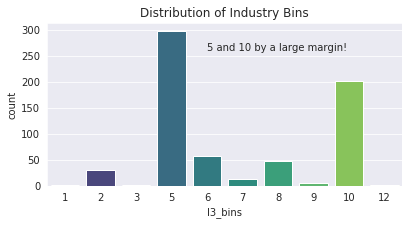

In [63]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,3))

# PLOT - distribution of industry bins
plt.subplot(1,2,1)
plt.text(4,260,"5 and 10 by a large margin!")
ax = sns.countplot(x="I3_bins", data=compdata_cat, palette="viridis")
ax.set(title="Distribution of Industry Bins")

plt.show()

- it is clear that bin 5, which is Manufacturing, and bin 10, which is Services, dominate the distribution.
- the other remaining bins are not even close to the top 2, so let's bin these in an 'Other' category and only use 3 bins.

## SIC Code Bins (REVISED)

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-1999 | Other |
| 2000-3999 | Manufacturing |
| 4000-6799 | Other |
| 7000-8999 | Services |
| 9100-9999 | Other |


In [64]:
def assign_I3_bins_new(I3):
    if I3 >= 100 and I3 <= 1999:                          
        return(1)
    if I3 >= 2000 and I3 <= 3999:                  
        return(2)
    if I3 >= 4000 and I3 <= 6799:                  
        return(1)
    if I3 >= 7000 and I3 <= 8999:                  
        return(3)
    if I3 >= 9000 and I3 <= 9999:                  
        return(1)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins_new'] = compdata_cat['I3'].apply(assign_I3_bins_new)  

compdata_cat.head()

,I1,I2,I3,C2,Y1,Y2,I3_bins,I3_bins_new
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,0,1,5,2
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,1,0,5,2
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,1,0,5,2
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,1,1,5,2
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,0,1,6,1


-----------------------------------

## Split Train and Test Data

In [65]:
#from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
#train_img, test_img, train_lbl, test_lbl = train_test_split(
    #mnist.data, mnist.target, test_size=1/7.0, random_state=2019)


## Standardize Data

In [66]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit on training set only.
#scaler.fit(train_img)
# Apply transform to both the training set and the test set.
#train_img = scaler.transform(train_img)
#test_img = scaler.transform(test_img)

# Feature Selection